1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
import scipy
%matplotlib inline

Initial guess [-1, 1]
Sol number: 1  with x: -0.1271484374999992 y: 1.0 f(x,y): -0.06302899070890812
Sol number: 2  with x: -0.12714843749999916 y: 1.0 f(x,y): -0.06302899070890812
Sol number: 3  with x: -0.12724609374999918 y: 1.0 f(x,y): -0.06302895574861303
Initial guess [0, 0]
Sol number: 1  with x: -0.08985145273780815 y: 0.7126653796314092 f(x,y): -1.031628452567338
Sol number: 2  with x: -0.08980805205476922 y: 0.7126717631781796 f(x,y): -1.031628446539581
Sol number: 3  with x: -0.08977994936150797 y: 0.7126308944632425 f(x,y): -1.0316284347273685
The gloab minima of this function is  -1.031628452567338  with [x,y]= [-0.08985145  0.71266538] 
the number of global minima are 3
For initial guess [0, 0]  in respect to the previous starting  point, is decreases the value of the function to -1.031628452567338 and this leads to a better solution


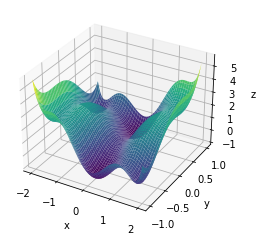

In [2]:
def f(a):
    x=a[0]
    y=a[1]
    t1=(4-2.1*(x**2)+(x**4)/(3))*x**2
    t2=x*y
    t3=((4*y**2)-4)*y**2
    return t1+t2+t3

x0 = np.linspace(-2, 2, 100)
x1 = np.linspace(-1, 1, 100)
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x0, x1)
Z = f([X, Y])
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


ini_point=[-1,1]
print("Initial guess",ini_point )    
sol=optimize.minimize(f, ini_point, args=(), method='Nelder-Mead',bounds=[[-2,2],[-1,1]])
ind=1
for s in sol.final_simplex[0]:
    print("Sol number:",ind," with x:",s[0],"y:",s[1],"f(x,y):",f(s))
    ind+=1
    
ini_point=[0,0]
print("Initial guess",ini_point )
sol0=optimize.minimize(f, ini_point, args=(), method='Nelder-Mead',bounds=[[-2,2],[-1,1]])
ind=1
for s in sol0.final_simplex[0]:
    print("Sol number:",ind," with x:",s[0],"y:",s[1],"f(x,y):",f(s))
    ind+=1
min_glo=sol0.final_simplex[0]
print("The gloab minima of this function is ",f(min_glo[0])," with [x,y]=",min_glo[0],"\nthe number of global minima are",len(min_glo))
print("For initial guess",ini_point," in respect to the previous starting  point, is decreases the value of the function to",f(min_glo[0]),"and this leads to a better solution")


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

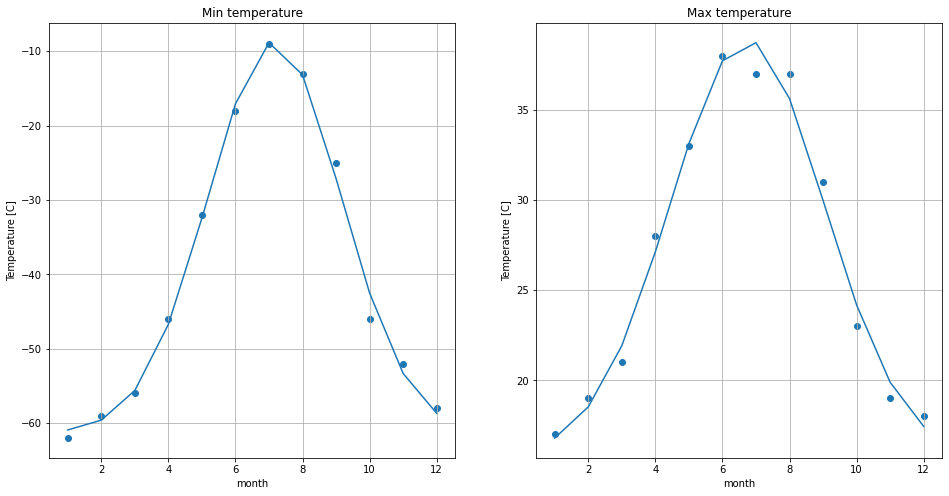

For both minimum and maximum temperatures are used a gaussian to fit the data, and from the two different plots, is shown that the curve fit well the data.


In [3]:
max_t=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_t=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
m=[1,2,3,4,5,6,7,8,9,10,11,12]
def gaus(x,mu,sig,off,scale):
    return off+scale*stats.norm.pdf(x, mu, sig)

par,pcov= optimize.curve_fit(gaus,m,max_t)
y=[gaus(x,par[0],par[1],par[2],par[3]) for x in m]

par2,pcov2= optimize.curve_fit(gaus,m,min_t,p0 = [par[0], par[1], par[2], -par[3]])
y2=[gaus(x,par2[0],par2[1],par2[2],par2[3]) for x in m]


fig, ax = plt.subplots(1,2,figsize=(16,8)) # create the figure and the axes
ax[0].scatter(m,min_t,label='data')
ax[0].set_title('Min temperature')
ax[0].set_xlabel('month')
ax[0].set_ylabel('Temperature [C]')
ax[0].plot(m, y2,label='fitted function')
ax[0].grid()

ax[1].scatter(m,max_t,label='data')
ax[1].set_title('Max temperature')
ax[1].set_xlabel('month')
ax[1].set_ylabel('Temperature [C]')
ax[1].plot(m, y, label='fitted function')
ax[1].grid()
plt.show()

print("For both minimum and maximum temperatures are used a gaussian to fit the data, and from the two different plots, is shown that the curve fit well the data.")

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

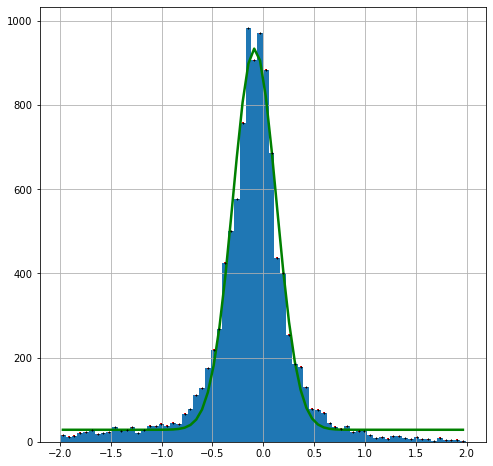

the chi-square obtained is:  75628.79972102473 with 69 degree of freedom
p-value = 0.0
Since the p-value is smaller than the 0.05 (confidence) the fit chosen is not satisfactory, as is possible to see at the tail of the curve in the figure 


In [4]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
def gaus(x,mu,sig,off,scale):
    return off+scale*stats.norm.pdf(x, mu, sig)


file_name= "data/residuals_261.pkl"
diz=dict(pd.read_pickle(file_name).item())
data=pd.DataFrame(diz)
res=data[data["residuals"]>-2]
res=res[res["residuals"]<2]["residuals"]
fig, ax = plt.subplots(figsize=(8,8)) # create the figure and the axes
val,bin_edge,_=ax.hist(res,70)
bin_center=np.array([0.5*(bin_edge[i]+bin_edge[i+1]) for i in range(0,len(bin_edge)-1)])
ax.grid()
for n in val:
    sigma=np.sqrt(n)
ax.errorbar(bin_center, val, yerr=sigma, fmt="+k", ecolor='red', elinewidth=2, markersize=2)


par,_= optimize.curve_fit(gaus,bin_center,val)
mu=par[0]
sig=par[1]
off=par[2]
scale=par[3]
y=[gaus(x,mu,sig,off,scale) for x in bin_center]



ax.plot(bin_center, y,color='green',linewidth=2.5, label='fitted function')
plt.show()

ndof = len(val) - 1


chi_quadro=np.sum(((y-val)/sigma)**2)
print('the chi-square obtained is: ', chi_quadro, 'with',ndof,'degree of freedom')
pvalue = 1. - stats.chi2.cdf(chi_quadro, ndof)
print("p-value =", pvalue) 
print("Since the p-value is smaller than the 0.05 (confidence) the fit chosen is not satisfactory, as is possible to see at the tail of the curve in the figure ")

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [5]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
data = np.loadtxt('munich_temperatures_average_with_bad_data.txt')

# S: scrubbing data
year, temp = data.T # trick: columns to variables
data = pd.DataFrame({'year' : year,'temp' : temp,})
data=data.loc[(data["temp"] <40)]
def f(t,a,b,c):
    return a*np.cos(2*np.pi*t+b)+c
def g(t,a,b,c,d):
    return a*np.cos(2*np.pi*t*b+c)+d
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

Coldest year: 2009.02738 predicted temp: -0.6797039803055469
Hottest year: 2010.52293 predicted temp: 19.184039132921484
Avarage temperature in Munich between 2008 and 2012 is: 9.261252084167236
The value of b is equal to -0.23462775670903221  and represent the peak of the temperature measured in the year, since it is inside the coseno the value is periodic over the year and is equal to 0.7653722432909678


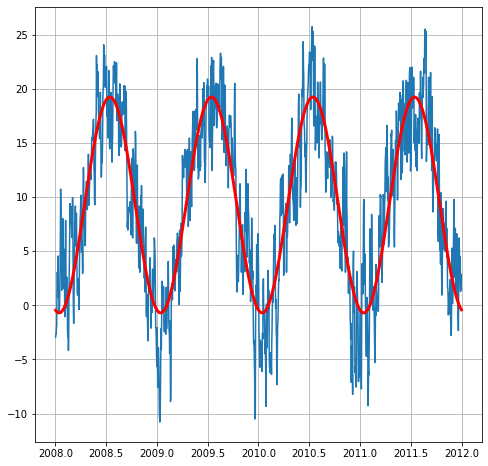

In [6]:
data_range=data.loc[(data["year"] >2008) & (data["year"] <2012)]

yr=data_range["year"]
tr=data_range["temp"]
cold_y= data_range["year"][4748+data_range["temp"].argmin()]
hot_y=data_range["year"][4748+data_range["temp"].argmax()]




par,_= optimize.curve_fit(f,yr,tr,p0=[10,0.6,-0.3])
a=par[0]
b=par[1]
c=par[2]

fit=[f(y,a,b,c) for y in yr]

print("Coldest year:",cold_y,"predicted temp:",f(cold_y,a,b,c))
print("Hottest year:",hot_y,"predicted temp:", f(hot_y,a,b,c))

avg_temp=np.mean(tr)
print("Avarage temperature in Munich between 2008 and 2012 is:",avg_temp)
print("The value of b is equal to",b," and represent the peak of the temperature measured in the year, since it is inside the coseno the value is periodic over the year and is equal to",1+b)


fig, ax = plt.subplots(figsize=(8,8))
ax.plot(yr,tr)
ax.plot(yr,fit,linewidth=3,color='red')
ax.grid()
plt.show()

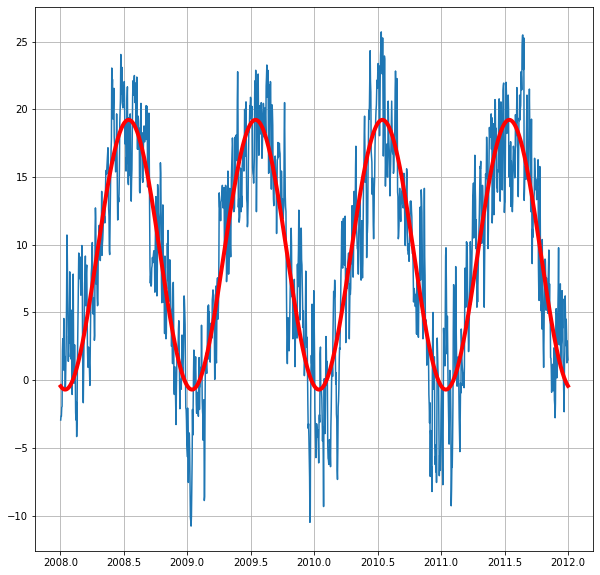

RSS (f(x)) is: 18669.515394578364
RSS1 (g(x)) is: 18669.225430564933
Fisher F-test  3vs4 parameters 
CL: 0.880 , additional parameter necessary: NO


In [7]:
par,_= optimize.curve_fit(g,yr,tr)
a=par[0]
b=par[1]
c=par[2]
d=par[3]

fit1=[g(y,a,b,c,d) for y in yr]
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(yr,tr)
ax.plot(yr,fit1,linewidth=4,color='red')
ax.grid()
plt.show()
RSS = np.sum((fit - tr)**2)
ndof_1=2
RSS1 = np.sum((fit1 - tr)**2)
ndof_2=3
N=len(yr)
print("RSS (f(x)) is:",RSS)
print("RSS1 (g(x)) is:",RSS1)
print("Fisher F-test  3vs4 parameters ")
result = Ftest(RSS, RSS1, ndof_1, ndof_2, N, verbose=True)